<a href="https://colab.research.google.com/github/asimoya99/Computer-Vision/blob/master/ImageTransformation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
# from matplotlib import matplotlib.pyplot as plt
import cv2


In [6]:
#input shape 

image = cv2.imread('/content/clear_image_greyscale (1).png')
w,h = image.shape[1],image.shape[0]

#create translation matrix 
tx = w/2 #half of width
ty = h/2 #half of the height 

translation_matrix = np.float32([[1,0,tx], [0,1,ty]])


#apply the translation using the warp affine function
output_size = (w*2, h*2)
translated_image = cv2.warpAffine(image, translation_matrix, output_size);

In [ ]:
from google.colab.patches import cv2_imshow

cv2_imshow(translated_image)

In [10]:
translated_image = cv2.resize(translated_image,(100,100))

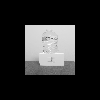

In [11]:
cv2_imshow(translated_image)

In [12]:
# rotation 

w, h = translated_image.shape[1], translated_image.shape[0]

# create a rotation matrix 
rot_angle = 90 # in degrees
scale = 1 # keep the size the same 

rotation_matrix = cv2.getRotationMatrix2D((w/2, h/2), rot_angle, 1)

# apply the rotation using warpAffine
output_size =  (w*2, h*2)
rotated_flower = cv2.warpAffine(translated_image, rotation_matrix, output_size)

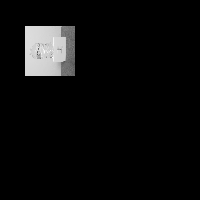

In [13]:
cv2_imshow(rotated_flower)

In [16]:
# transformation affine 

# create transformation matrix form preselected points
pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])

image = cv2.resize(image,(200,200))
affine_tr = cv2.getAffineTransform(pts1, pts2)
trasformed = cv2.warpAffine(image, affine_tr, (image.shape[1],image.shape[0]*2))

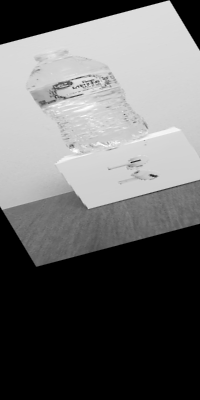

In [17]:
cv2_imshow(trasformed)

In [18]:
# pyramids --> rescaling photograph either increasing resolution or decreasing it 
#downsample image by halving both width and height 
#input: (h,w) --> output:(h/2, w/2)
lower_resolution_img = cv2.pyrDown(image)


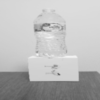

In [19]:
cv2_imshow(lower_resolution_img)

In [20]:

# upsample the image 

higher_reso_img = cv2.pyrUp(image)

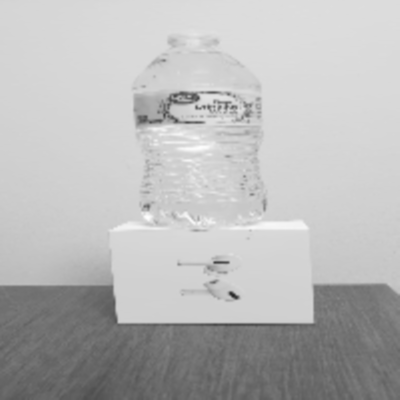

In [21]:
cv2_imshow(higher_reso_img)

In [24]:
dim_x = 100 #input dims
dim_y = 2 # output dims

batch = 10 #batch size for training

learning_rate = 1e-4 
steps = 5000

#create random input and target 
x = np.random.randn(batch, dim_x)
y = np.random.randn(batch, dim_y)

#initialize the weight matrix 
w = np.random.randn(dim_x, dim_y)

In [ ]:

#cnn
def net(x,w):
  #simple neural network

  return 1/( 1 + np.exp(-x.dot(w)))


def compute_loss(y, y_pred):
    """
    Loss function : sum(y_pred**2 - y**2)
    y: ground truth targets 
    y_pred: predicted target values
    """
    return np.mean((y_pred-y)**2) 

def backdrop(y,y_pred, w, x):

  # back propagation
  y_grad  = 2.0 * (y_pred-y)

  #inner layer grads
  w_grad = x.T.dot(y_grad * y_pred * (1 - y_pred))
  return w_grad

for i in range(steps):

  # feed forward pass
  y_pred = net(x,w)

  #compute loss
  loss = compute_loss(y, y_pred)
  print("Loss", loss, "at step:",i)

  # compute the grads using backdrop
  w_grad = backdrop(y, y_pred,w, x)

  #update weights with some learning rate
  w -= learning_rate * w_grad

In [29]:
from keras.layers import Conv2D, Input
from keras.models import  Model


In [31]:
def print_model():
  #create sample model and prints output shape
  #use this to analyse convolution parameters 
  #create input with given shape 

  x = Input(shape = (512,512,3))

  # create a convolution layer 
  y = Conv2D(filters = 32, kernel_size = (5,5), strides = 1, padding = "same", use_bias = False)(x)

  #create the model
  model = Model(inputs = x, outputs = y)

 #print the model 
  model.summary()
print_model()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 512, 512, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 512, 512, 32)      2400      
Total params: 2,400
Trainable params: 2,400
Non-trainable params: 0
_________________________________________________________________


In [32]:
from keras.layers import  Conv2D, Input, Activation
from keras.models import Model

def print_model():
  x = Input(shape=(512,512, 3))

  #create a convolution layer 
  conv = Conv2D(filters=32, kernel_size=(5,5), strides=1, padding = "same",use_bias=True)(x)

  #add activation layer 
  y = Activation('relu')(conv)

  #create model 
  model = Model(inputs = x, outputs = y)

  #print model
  model.summary()
print_model()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 512, 512, 3)]     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 512, 512, 32)      2432      
_________________________________________________________________
activation (Activation)      (None, 512, 512, 32)      0         
Total params: 2,432
Trainable params: 2,432
Non-trainable params: 0
_________________________________________________________________


In [35]:

#Pooling
from keras.layers import  Input, Conv2D, MaxPool2D, Dense
from keras.models import  Model

def print_model():
  #create sample model and print output shape 

  x = Input(shape=(512,512,3))
  #create convolution 
  conv = Conv2D(filters=32, kernel_size=(5,5), activation='relu',strides=1, padding='same', use_bias=False)(x)
  pool = MaxPool2D(pool_size = (2,2))(conv)

  #create the model 
  model = Model(inputs = x, outputs = pool)

  #print the model 
  model.summary()
print_model()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 512, 512, 3)]     0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 512, 512, 32)      2400      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 256, 256, 32)      0         
Total params: 2,400
Trainable params: 2,400
Non-trainable params: 0
_________________________________________________________________


In [36]:
#fully connected layer. 

def print_model():
  #creates model 
  x = Input(shape=(512,))

  #creates fully connected layer 
  y = Dense(32)(x)

  #create model
  model = Model(inputs = x, outputs = y)

  #print model
  model.summary()
print_model()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 512)]             0         
_________________________________________________________________
dense (Dense)                (None, 32)                16416     
Total params: 16,416
Trainable params: 16,416
Non-trainable params: 0
_________________________________________________________________
